In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

# Симуляция парадокса

C:\Users\1\AppData\Local\Temp\ipykernel_24552\2632750588.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['wins if player keeps chosen door', 'wins if player changes chosen door']);


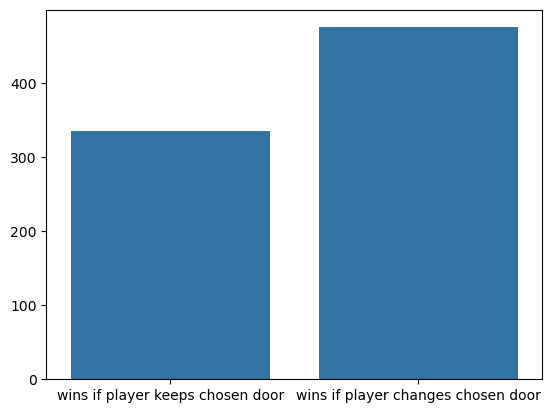

In [4]:
def goat_experiment():
    # Зададим итоговые массивы
    wins_if_change = 0
    wins_if_not_change = 0


    for _ in range(1000):
        # Генерируем двери
        doors = {x: 0 for x in range(1, 4)}

        # Рандомно определяем, где автомобиль и помещаем эту информацию в словарь с дверьми
        prize = np.random.choice(range(1, 4))
        doors[prize] = 1

        # Игрок выбирает дверь
        player_choice_1 = np.random.choice(range(1, 4))

        # Создадим массив с дверьми и удалим из него дверь за которой автомобиль
        # Также попробуем удалить дверь на случай, если игрок не угадал
        # После чего возьмем случайный семпл из оставшихся, если там 2 двери. Если одна, она и будет выбрана
        se = list(range(1, 4))
        se.remove(prize)
        try:
            se.remove(player_choice_1)
        except ValueError:
            pass
        door_to_open = np.random.choice(se)

        del doors[door_to_open]

        # Проверяем, угадал ли игрок и если угадал, то в каком случае - если поменял решение или не поменял
        if prize == player_choice_1:
            wins_if_not_change += 1

        player_choice_2 = np.random.choice(list(doors.keys()))

        if prize == player_choice_2:
            wins_if_change += 1

    return wins_if_change, wins_if_not_change

wins_if_change, wins_if_not_change = goat_experiment()
# Визуализируем
ax = sns.barplot([wins_if_not_change, wins_if_change]);
ax.set_xticklabels(['wins if player keeps chosen door', 'wins if player changes chosen door']);

# Анализ полученных данных

Убедившись, что парадокс работает, сделаем более глубокие выводы. Насколько конкретно повышается вероятность?

In [10]:
data = []
for _ in tqdm(range(1000)):
    data.append(goat_experiment())

data = pd.DataFrame(data)
data

100%|██████████| 1000/1000 [00:57<00:00, 17.50it/s]


,0,1
0,496,322
1,496,328
2,500,303
3,537,327
4,491,337
...,...,...
995,475,343
996,480,336
997,529,333
998,477,327


In [11]:
data.rename(columns={0: 'change', 1: 'not_change'}, inplace=True)

Посмотрим на динамику

<Axes: ylabel='change'>

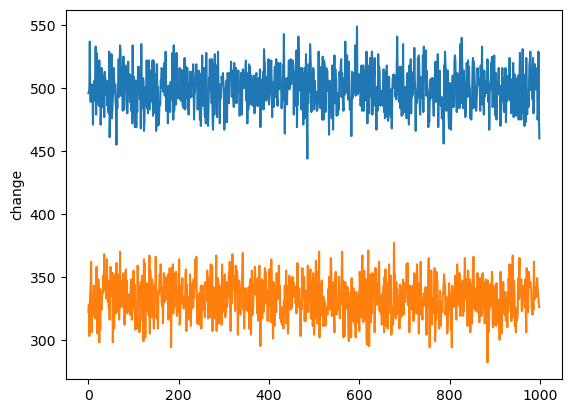

In [12]:
sns.lineplot(data.change)
sns.lineplot(data.not_change)

Выглядит равномерно, что позволяет взять средние значения

In [13]:
print(f'Примерная вероятность выиграть если не менять решение: {(data["not_change"].mean() / 1000) * 100}%')
print(f'Примерная вероятность выиграть если поменять решение: {(data["change"].mean() / 1000) * 100}%')

Примерная вероятность выиграть если не менять решение: 33.3575%
Примерная вероятность выиграть если поменять решение: 49.9607%


# Итог
Результаты подтверждают тезис о том, что если не менять решение, то выбор делется из трех дверей и вероятность 1/3, а если поменять решение, то выбор делается из двух дверей и вероятность в таком случае 1/2.